# Import modules

In [1]:
import matplotlib.pyplot as plt # for plotting
%matplotlib inline
import numpy as np # for numpy
from math import pi, sin, cos # for math
DEGREES_TO_RADIANS = pi / 180
from math import isnan
from ect import ECT, EmbeddedGraph # for creating ECT
from sklearn.manifold import MDS # for MDS

# from [Fractal Generation with L-Systems](https://nb.paulbutler.org/l-systems/) By Paul Butler – July 9, 2017

# from [The Algorithmic Beauty of Plants](http://algorithmicbotany.org/papers/#abop)

# Define functions

In [2]:
def plot_coords(coords, nrow, ncol, plot_num, col, bare_plot=False):
    if bare_plot:
        # Turns off the axis markers.
        plt.axis('off')
    # Ensures equal aspect ratio.
    plt.axes().set_aspect('equal', 'datalim')
    # Converts a list of coordinates into 
    # lists of X and Y values, respectively.
    X, Y = zip(*coords)
    # Draws the plot.
    plt.subplot(nrow, ncol, plot_num)
    plt.plot(X, Y, lw=0.5, c=col);

In [3]:
def turtle_to_coords(turtle_program, turn_amount=45):
    # The state variable tracks the current location and angle of the turtle.
    # The turtle starts at (0, 0) facing up (90 degrees).
    state = (0.0, 0.0, 90.0)
    
    # Throughout the turtle's journey, we "yield" its location. These coordinate
    # pairs become the path that plot_coords draws.
    yield (0.0, 0.0)
    
    # Loop over the program, one character at a time.
    for command in turtle_program:
        x, y, angle = state
        
        if command in 'Ff':      # Move turtle forward
            state = (x - cos(angle * DEGREES_TO_RADIANS),
                     y + sin(angle * DEGREES_TO_RADIANS),
                     angle)
            
            if command == 'f':
                # Insert a break in the path so that
                # this line segment isn't drawn.
                yield (float('nan'), float('nan'))
                
            yield (state[0], state[1])
                        
        elif command == '+':     # Turn turtle clockwise without moving
            state = (x, y, angle + turn_amount)
            
        elif command == '-':     # Turn turtle counter-clockwise without moving
            state = (x, y, angle - turn_amount)
            
        # Note: We silently ignore unknown commands

In [4]:
def get_coords(coords):
    coordX_list = [] # a list to store X coordinates
    coordY_list = [] # a list to store Y coordinates
    for (x, y) in coords:
        if isnan(x):
            coord_list.append('NA')
        else:
            coordX_list.append(x)
            coordY_list.append(y)
    return coordX_list, coordY_list

In [5]:
def transform_sequence(sequence, transformations):
    return ''.join(transformations.get(c, c) for c in sequence)

In [6]:
def transform_multiple(sequence, transformations, iterations):
    for _ in range(iterations):
        sequence = transform_sequence(sequence, transformations)
    return sequence

In [7]:
def branching_turtle_to_coords(turtle_program, turn_amount=45):
    saved_states = list()
    state = (0, 0, 90)
    yield (0, 0)

    for command in turtle_program:
        x, y, angle = state
        
        # Move forward (matches a-j and A-J)
        
        if command.lower() in 'abcdefghijklmnopqrstuvwxyz': 
            state = (x - cos(angle * DEGREES_TO_RADIANS),
                     y + sin(angle * DEGREES_TO_RADIANS),
                     angle)
            
            # Add a break in the line if command matches a-j  
            if command.islower():                  
                yield (float('nan'), float('nan'))

            yield (state[0], state[1])

        # Turn clockwise
        elif command == '+':                       
            state = (x, y, angle + turn_amount)

        # Turn counterclockwise
        elif command == '-':                       
            state = (x, y, angle - turn_amount)

        # Remember current state
        elif command == '[':                      
            saved_states.append(state)

        # Return to previous state
        elif command == ']':                       
            state = saved_states.pop()
            yield (float('nan'), float('nan'))
            x, y, _ = state
            yield (x, y)

        # Note: We silently ignore unknown commands

In [8]:
def l_plot(axiom, transformations, nrow, ncol, plot_num, col, iterations=0, angle=45):
    turtle_program = transform_multiple(axiom, transformations, iterations)
    coords = branching_turtle_to_coords(turtle_program, angle)
    plot_coords(coords, nrow, ncol, plot_num, col, bare_plot=True) # bare_plot removes the axis labels

# Try out some L-systems

/var/folders/74/p7lyl9yx35b6wh5_7x3ply4r0000gq/T/ipykernel_91970/4261444243.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(nrow, ncol, plot_num)


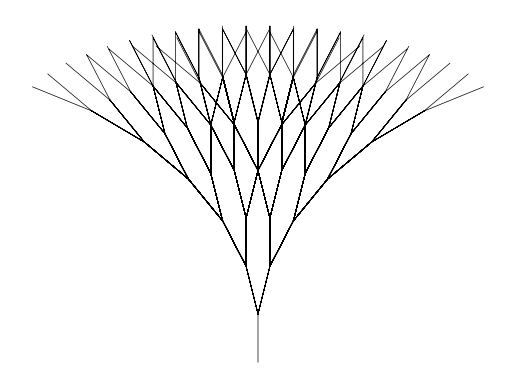

In [9]:
# angles 10, 20, and 30
l_plot('F',{'F':'F[-F][+F]'}, # axiom, transformation
       1,1,1,"k", # subplot, nrow, ncol, plot number, color
       6,10) # number of iterations, angle


/var/folders/74/p7lyl9yx35b6wh5_7x3ply4r0000gq/T/ipykernel_91970/4261444243.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(nrow, ncol, plot_num)


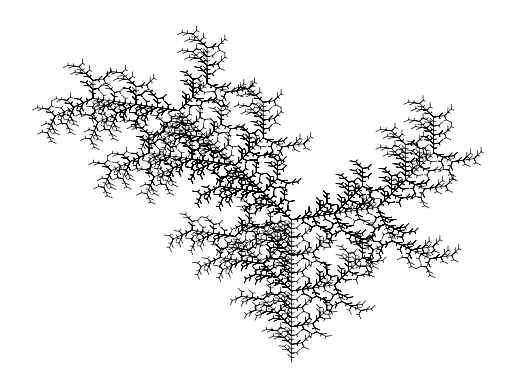

In [10]:
# angles 10, 40, 70
l_plot('F', {'F': 'FF[++F][-FF]'},  # axiom, transformation
       1,1,1,"k", # subplot, nrow, ncol, plot number, color
       6, 40) # number of iterations, angle

/var/folders/74/p7lyl9yx35b6wh5_7x3ply4r0000gq/T/ipykernel_91970/4261444243.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(nrow, ncol, plot_num)


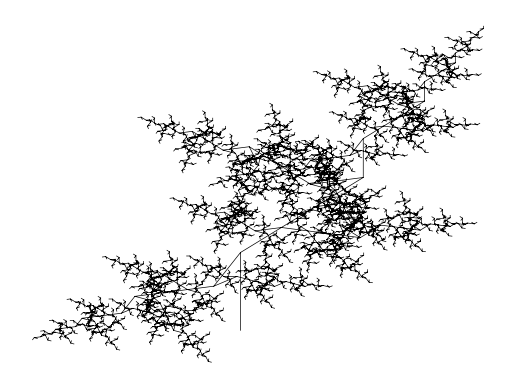

In [11]:
# 5 , 27.5, 50
l_plot('A', {'F': 'FF', 'A': 'F[+AF-[A]--A][---A]'}, # axiom, transformation
       1,1,1,"k", # subplot, nrow, ncol, plot number, color
       6, 50) # number of iterations, angle

# Plot out all the L-systems!

/var/folders/74/p7lyl9yx35b6wh5_7x3ply4r0000gq/T/ipykernel_91970/4261444243.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(nrow, ncol, plot_num)


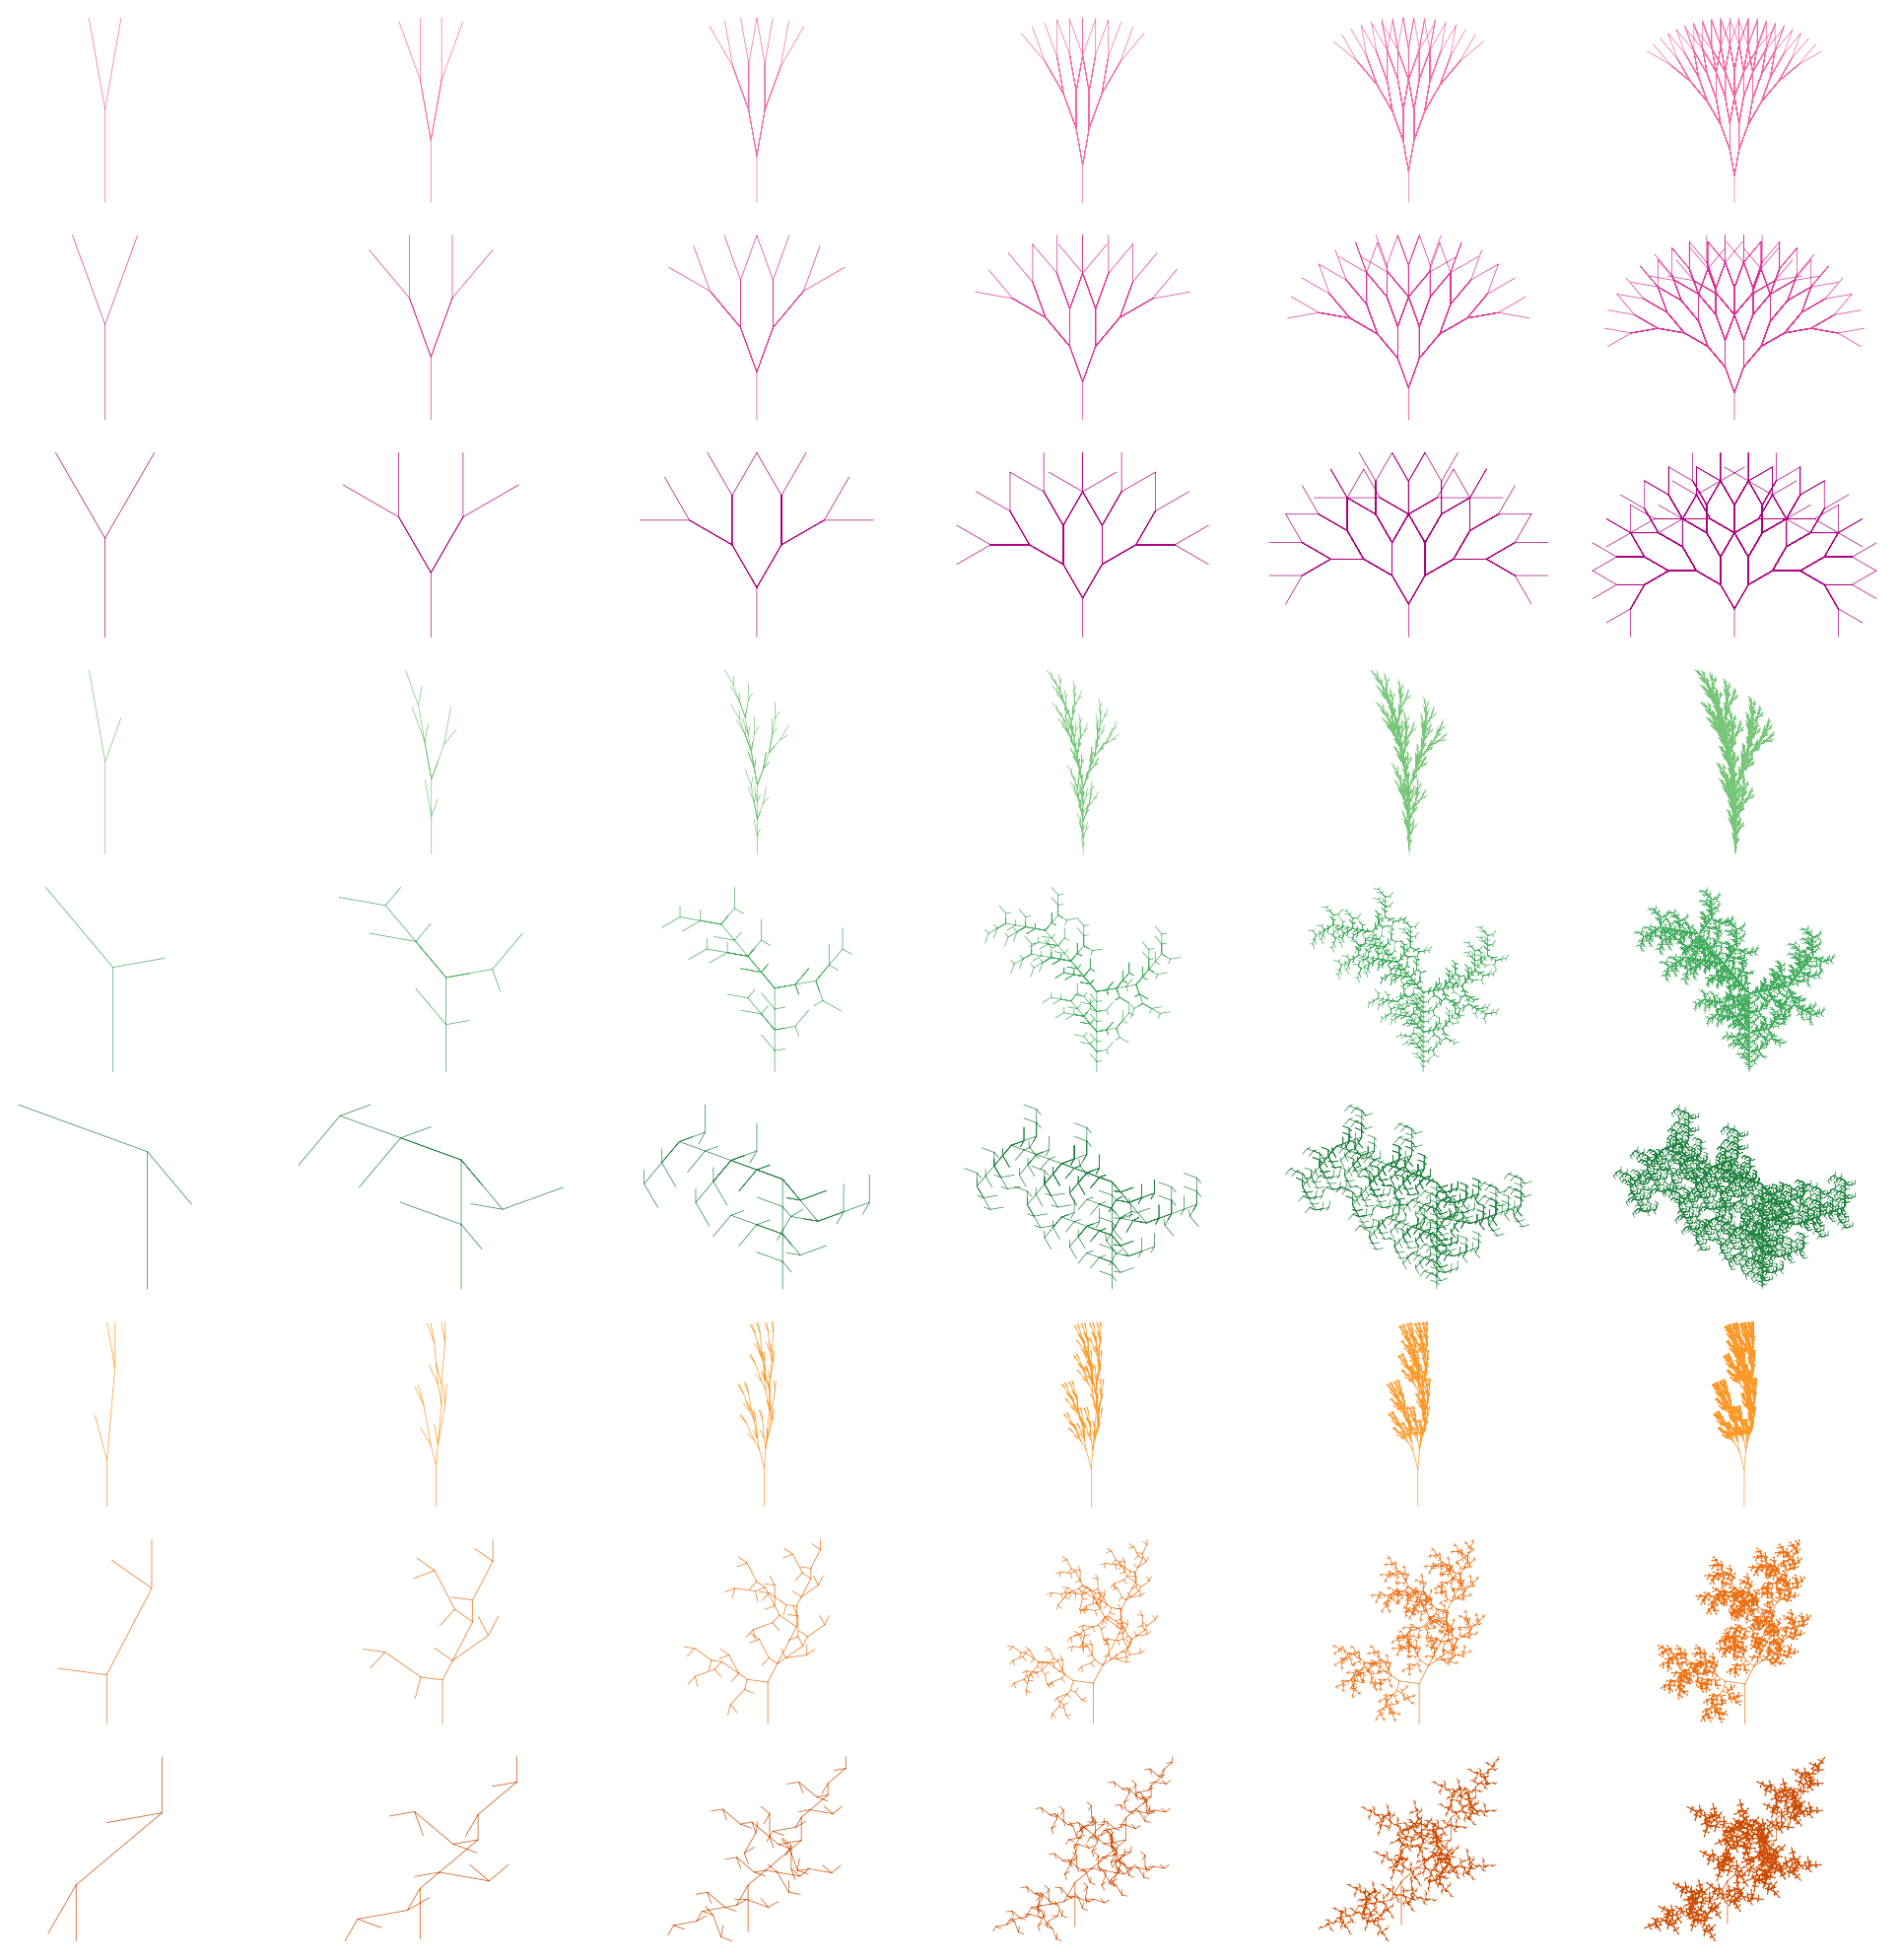

In [12]:
plt.figure(figsize=(20,20))

counter = 1 # counter for subplot number

angsA = [10,20,30]
colsA = ["#f768a1","#dd3497","#ae017e"]
for i in range(3): # for each angle
    angle = angsA[i] # get current angle
    col = colsA[i] # get current angle
    for j in range(1,7): # for each iteration
        l_plot('F',{'F':'F[-F][+F]'}, # axiom, transformation
           9,6,counter,col, # subplot, nrow, ncol, plot number, color
           j,angle) # number of iterations, angle
        plt.axis("off")
        plt.gca().set_aspect("equal")
        counter += 1 # iterate counter by 1

angsB= [10,40,70]
colsB = ["#78c679","#41ab5d","#238443"]
for i in range(3): # for each angle
    angle = angsB[i] # get current angle
    col = colsB[i] # get current angle
    for j in range(1,7): # for each iteration
        l_plot('F', {'F': 'FF[++F][-FF]'}, # axiom, transformation
           9,6,counter,col, # subplot, nrow, ncol, plot number, color
           j,angle) # number of iterations, angle
        plt.axis("off")
        plt.gca().set_aspect("equal")
        counter += 1 # iterate counter by 1
        
angsC = [5,27.5,50]
colsC = ["#fe9929","#ec7014","#cc4c02"]
for i in range(3): # for each angle
    angle = angsC[i] # get current angle
    col = colsC[i] # get current angle
    for j in range(1,7): # for each iteration
        l_plot('A', {'F': 'FF', 'A': 'F[+AF-[A]--A][---A]'}, # axiom, transformation
           9,6,counter,col, # subplot, nrow, ncol, plot number, color
           j,angle) # number of iterations, angle
        plt.axis("off")
        plt.gca().set_aspect("equal")
        counter += 1 # iterate counter by 1
        
plt.tight_layout()


# Let's figure out how to retrieve coordinates for graph

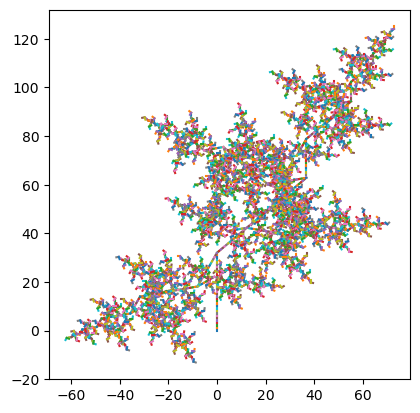

In [13]:
turtle_program = transform_multiple('A',{'F': 'FF', 'A': 'F[+AF-[A]--A][---A]'}, 6)
coords = branching_turtle_to_coords(turtle_program, 50)

X, Y = zip(*coords)

for i in range(len(X)-1):
    
    if i =="nan":
        continue
    else:
        plt.plot([X[i], X[i+1]], [Y[i], Y[i+1]])
        plt.gca().set_aspect("equal")

In [14]:
# put coordinates into 2D array
# round so there is no redundancy

coord_arr = np.array((np.round(X,4),np.round(Y,4))).T

# get unique coordinate values
unique_nodes = np.unique(coord_arr, axis=0)
unique_nodes = unique_nodes[~np.isnan(unique_nodes[:,0])]

# create a list the same length as coordinate array 
# we can use the node identities to put in edges
node_list = []

for i in range(len(coord_arr)):
    if np.isnan(coord_arr[i,0]):
        node_list.append("nan")
    else:
        for j in range(len(unique_nodes)):
            if (coord_arr[i,0]==unique_nodes[j,0]) & (coord_arr[i,1]==unique_nodes[j,1]):
                node_list.append(j)
            

<Axes: >

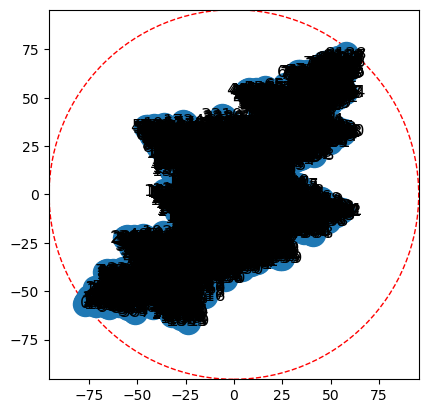

In [15]:
G = EmbeddedGraph() # initiate graph

for i in range(len(unique_nodes)): # for each unique node
    G.add_node(i,unique_nodes[i,0],unique_nodes[i,1]) # add the node as a node
    
# use the node list to put in edges using node identities
for i in range(len(node_list)-1):
    if node_list[i]=="nan":
        continue
    elif node_list[i+1]=="nan":
        continue
    else:
        G.add_edge(node_list[i],node_list[i+1])
        
        
G.set_mean_centered_coordinates() # mean center
r = G.get_bounding_radius() # get bounding radius
G.plot(bounding_circle=True) # plot with bounding radius
    

(-0.5, 99.5, 99.5, -0.5)

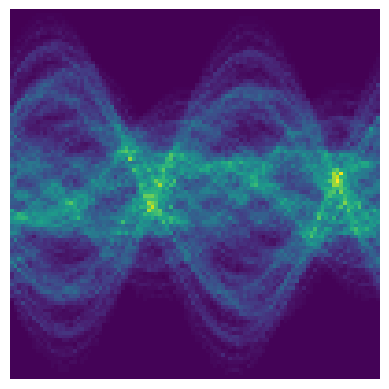

In [16]:
# initialize ECT
num_thresh = 100
num_dirs = 100
myect = ECT(num_dirs = num_dirs, num_thresh = num_thresh)

#calculate ECT
myect.calculateECT(G)

# The matrix is passed as an output above but is also saved internally. Get the saved matrix
M = myect.get_ECT()

#plot
plt.imshow(M.T)
plt.axis("off")

# Let get all the ECTs and plot them out!

In [17]:
# make a list of axioms and rules
rule_list = [['F',{'F':'F[-F][+F]'}],
             ['F', {'F': 'FF[++F][-FF]'}],
             ['A', {'F': 'FF', 'A': 'F[+AF-[A]--A][---A]'}]]

# make a list of angles
angle_list = [angsA, angsB, angsC]

# number of axes and thresholds
num_thresh = 100
num_dirs = 100

In [18]:
# to store ECTs
ect_arr = np.zeros((3*3,6,num_dirs,num_thresh))

counter = 0

for i in range(len(rule_list)): # for each set of rules
    
    curr_ax = rule_list[i][0] # get current axiom
    curr_rule = rule_list[i][1] # get current rule
    curr_angles = angle_list[0] # get current set of angles
    
    for j in range(len(curr_angles)): # for the angles to be evaluated
        
        curr_ang = curr_angles[j] # get the current angle
        
        print("system", i, ", angle", j)
        
        for k in range(6): # for each of 6 iterations
            
            # calculate the turtle program
            turtle_program = transform_multiple(curr_ax, # axion
                                                curr_rule, # rule
                                                k) # iterations
            
            # retrieve coordinates with current angle
            coords = branching_turtle_to_coords(turtle_program, curr_ang)

            X, Y = zip(*coords) # get X and Y coordinates
            
            # put coordinates into 2D array
            # round so there is no redundancy
            coord_arr = np.array((np.round(X,4),np.round(Y,4))).T

            # get unique coordinate values
            unique_nodes = np.unique(coord_arr, axis=0)
            unique_nodes = unique_nodes[~np.isnan(unique_nodes[:,0])]

            # create a list the same length as coordinate array 
            # we can use the node identities to put in edges
            node_list = []

            for n in range(len(coord_arr)):
                if np.isnan(coord_arr[n,0]):
                    node_list.append("nan")
                else:
                    for m in range(len(unique_nodes)):
                        if (coord_arr[n,0]==unique_nodes[m,0]) & (coord_arr[n,1]==unique_nodes[m,1]):
                            node_list.append(m)
                            
            G = EmbeddedGraph() # initiate graph

            for q in range(len(unique_nodes)): # for each unique node
                G.add_node(q,unique_nodes[q,0],unique_nodes[q,1]) # add the node as a node

            # use the node list to put in edges using node identities
            for r in range(len(node_list)-1):
                if node_list[r]=="nan":
                    continue
                elif node_list[r+1]=="nan":
                    continue
                else:
                    G.add_edge(node_list[r],node_list[r+1])


            G.set_mean_centered_coordinates() # mean center
            G.rescale_to_unit_disk(preserve_center=False) # rescale to unit disk
            
            # initialize ECT
            myect = ECT(num_dirs = num_dirs, num_thresh = num_thresh)

            #calculate ECT
            myect.calculateECT(G)

            # The matrix is passed as an output above but is also saved internally. Get the saved matrix
            M = myect.get_ECT()
            
            # save ECT
            ect_arr[counter, k] = M
            
        # advance rule/angle counter   
        counter += 1
            
            
            
    
    
    

system 0 , angle 0
system 0 , angle 1
system 0 , angle 2
system 1 , angle 0
system 1 , angle 1
system 1 , angle 2
system 2 , angle 0
system 2 , angle 1
system 2 , angle 2


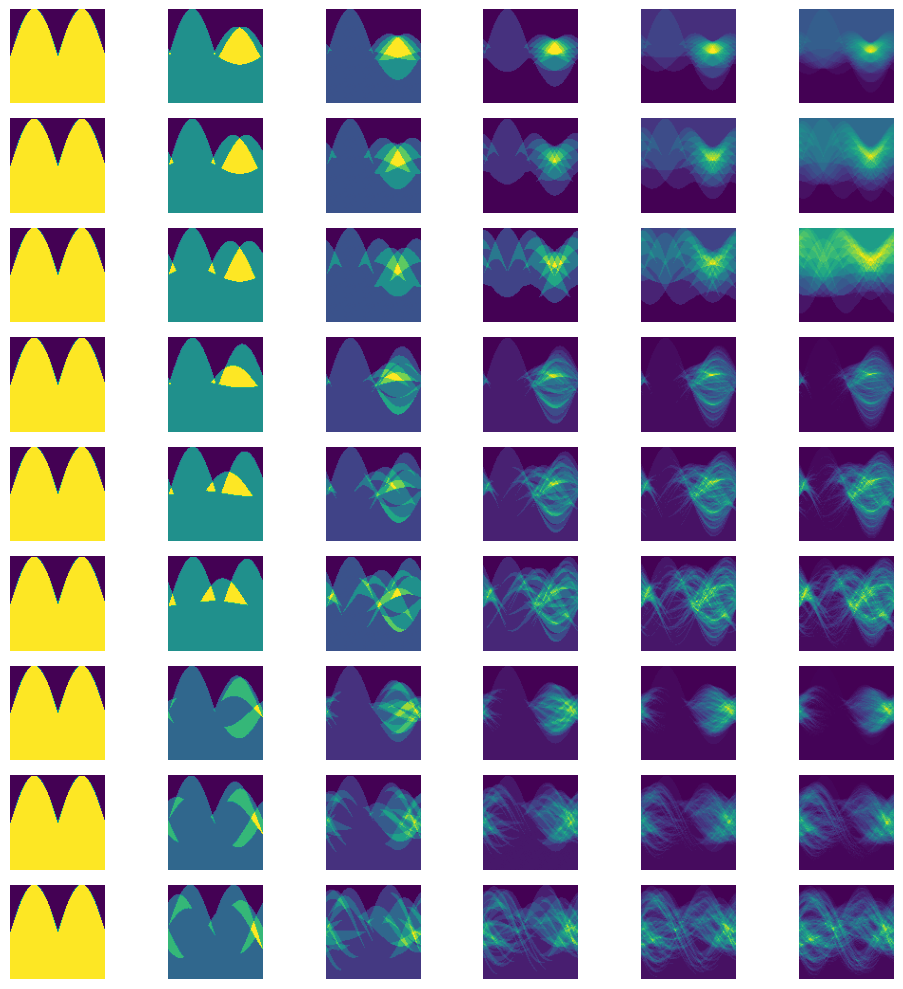

In [19]:
plt.figure(figsize=(10,10))

counter = 1

for i in range(np.shape(ect_arr)[0]):
    
    for j in range(np.shape(ect_arr)[1]):
        
        curr_ect = ect_arr[i,j,:,:]
        plt.subplot(9,6,counter)
        plt.imshow(curr_ect.T)
        plt.axis("off")
        
        counter +=1
        
plt.tight_layout()

# Get distance matrix of ECTs

In [20]:
# resize the ECT array
flat_ect_arr = np.reshape(ect_arr,(np.shape(ect_arr)[0]*np.shape(ect_arr)[1],100,100))

np.shape(flat_ect_arr)

(54, 100, 100)

In [21]:
# create array to store distance matrix
dist_arr = np.zeros((np.shape(flat_ect_arr)[0],np.shape(flat_ect_arr)[0]))

for i in range(np.shape(flat_ect_arr)[0]):
    ect1 = flat_ect_arr[i,:,:]
    for j in range(np.shape(flat_ect_arr)[0]):
        ect2 = flat_ect_arr[j,:,:]
        diff_ect = np.abs(ect2 - ect1) # difference between the two arrays
        dist_arr[i,j] = np.sum(diff_ect) # store the sum of the differences
        

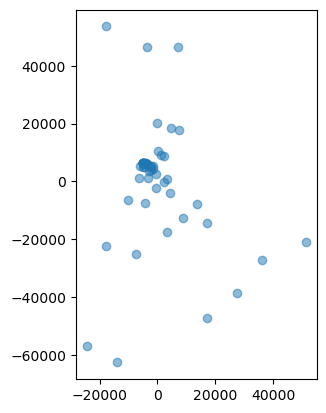

In [22]:
n_components = 2 # select number of components
mds = MDS(n_components=n_components, # initialize MDS
          dissimilarity="precomputed", # we have precomputed the distance matrix
          normalized_stress='auto',
          random_state=5 # select random state for reproducibility
         )
X = dist_arr # select distance array to analyze
MDS_scores = mds.fit_transform(X) # get MDS scores

plt.scatter(MDS_scores[:,0], MDS_scores[:,1], alpha=0.5) # plot
plt.gca().set_aspect("equal")

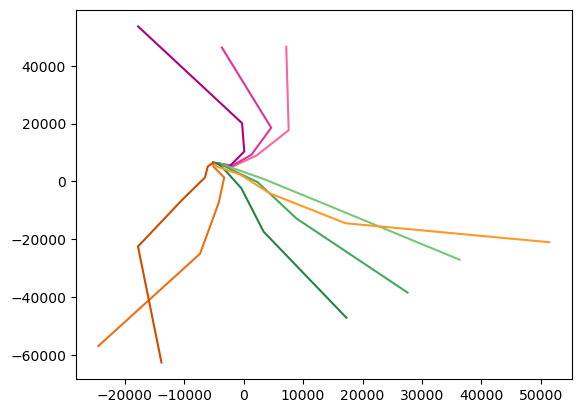

In [23]:
cols_list = [colsA, colsB, colsC]


for i in range(3):
    curr_col_list = cols_list[i]
    curr_MDS_rule = MDS_scores[i*18:((i*18)+18)]
    for j in range(3):
        curr_col = curr_col_list[j]
        curr_MDS_ang = curr_MDS_rule[j*6:((j*6)+6)]
        plt.plot(curr_MDS_ang[:,0], curr_MDS_ang[:,1], c=curr_col)
    
    

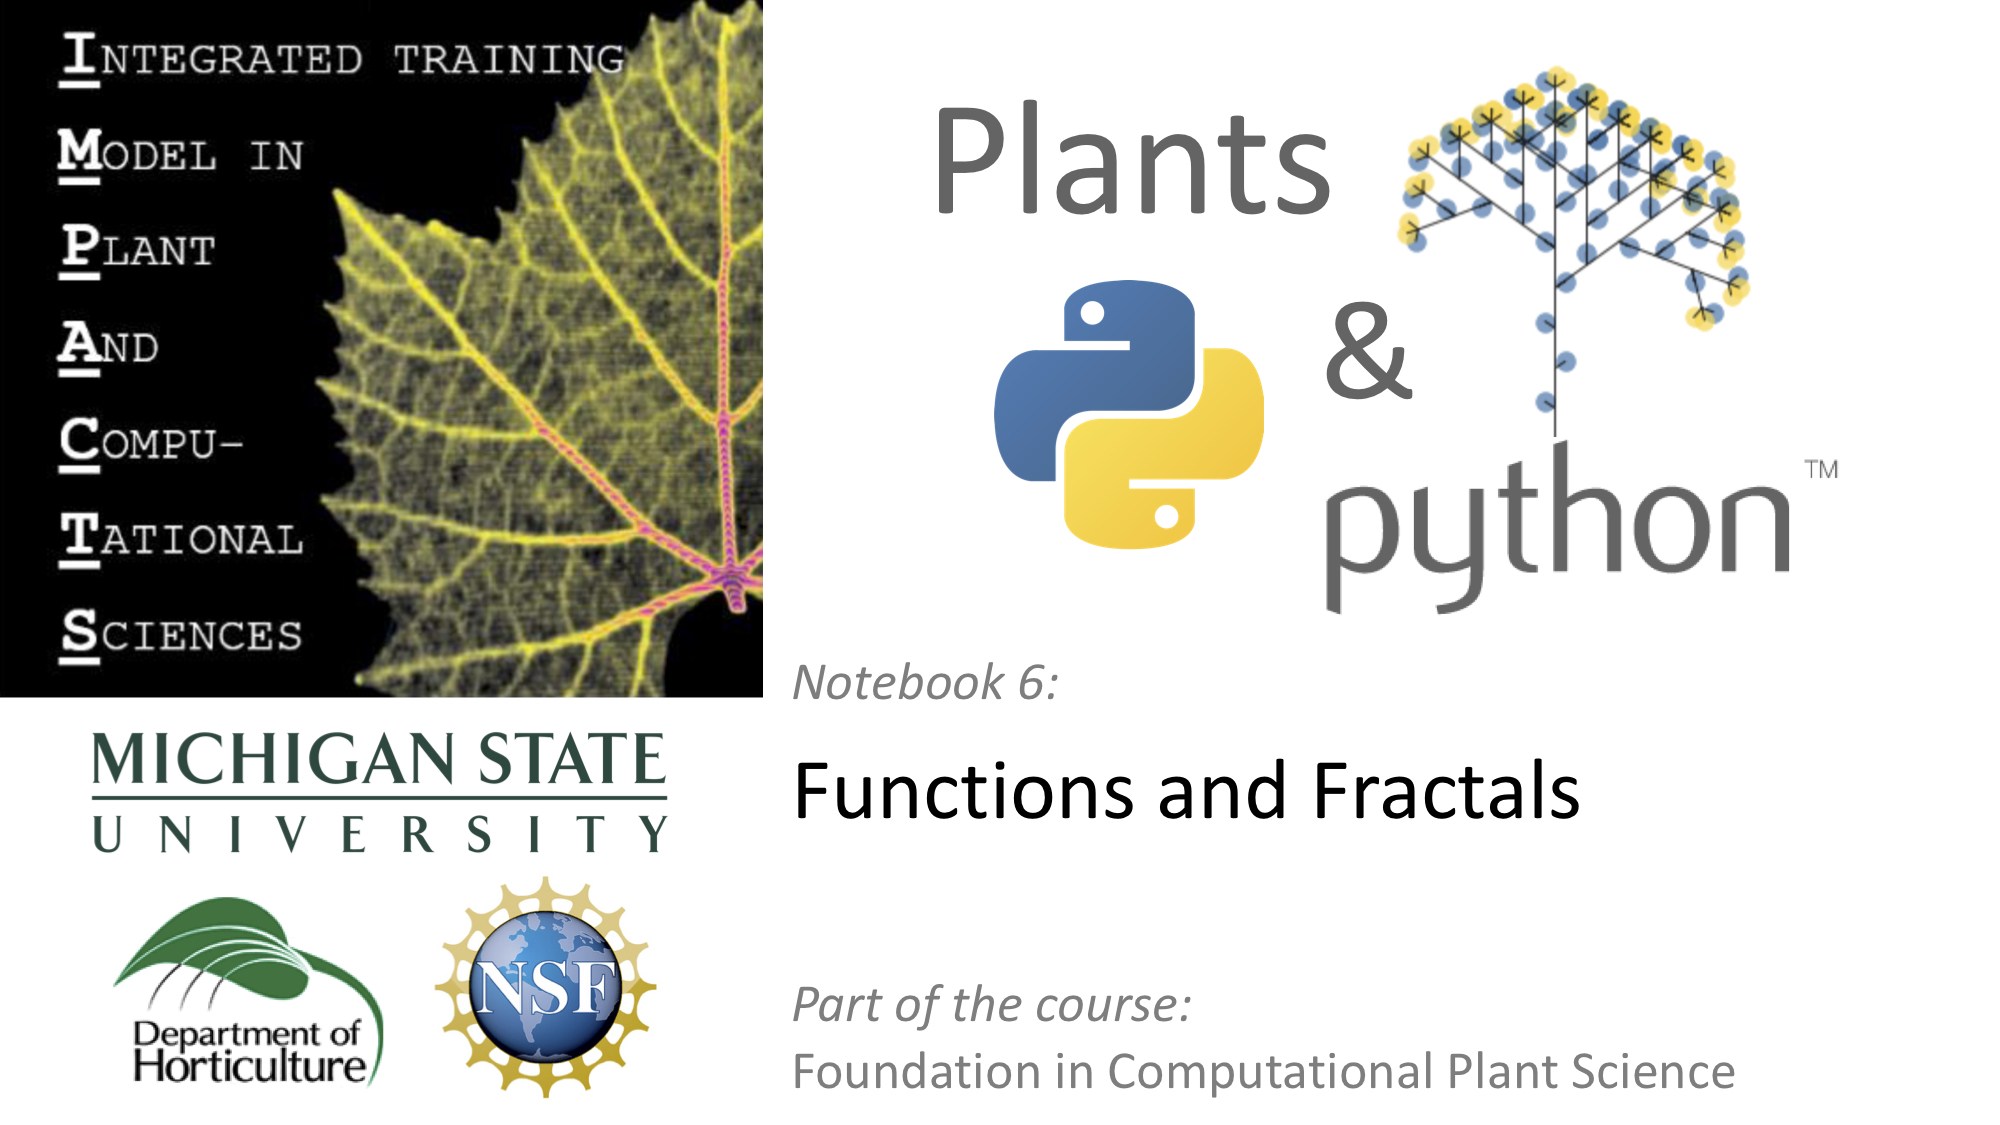

___
# Functions and fractals

In the previous notebooks ([here](https://nbviewer.jupyter.org/github/DanChitwood/PlantsAndPython/blob/master/PlantsAndPython4_STUDENT_Can_a_Biologist_Fix_a_Fern.ipynb) and [here](https://nbviewer.jupyter.org/github/DanChitwood/PlantsAndPython/blob/master/PlantsAndPython5_STUDENT_An_Array_of_Fronds.ipynb)) we learned about [Barnsley fern](https://en.wikipedia.org/wiki/Barnsley_fern#Python), a fractal that generates a frond using a series a functions that specify the rachis, pinnae, and the frond's modular structure. While successful at reproducing a fern frond, the algorithm is not a good model for plant development. Rather than generating random points that accumulate in pointillistic fashion to create shapes, plants arise from growing tips, ***shoot apical meristems***, that iteratively produce lateral organs (such as leaves and flowers). Just above every leaf where it joins the stem is an ***axillary meristem***. Axillary meristems may or may not become active, like the shoot apical meristem they arise from, to produce a branch. This iterative, modular structure of plants is the basis of their ***branching architectures***.

In this notebook and the following, we will be learning about Lindenmayer systems, or **L-systems**. We will be closely following [***The Algorithmic Beauty of Plants***](http://algorithmicbotany.org/papers/#abop), by Przemyslaw Prusinkiewicz and Aristid Lindenmayer (Springer-Verlag, 1990, ISBN 978-0-387-97297-8), the seminal publication in which how L-systems could model plant development was laid out. To quote the first paragraph of [Chapter 1](http://algorithmicbotany.org/papers/abop/abop-ch1.pdf):

> Lindenmayer systems — or L-systems for short — were conceived as
a mathematical theory of plant development [(Lindenmayer, 1968)](https://www.sciencedirect.com/science/article/pii/0022519368900799). Originally, they did
not include enough detail to allow for comprehensive modeling of higher
plants. The emphasis was on plant topology, that is, the neighborhood
relations between cells or larger plant modules. Their geometric aspects
were beyond the scope of the theory. Subsequently, several geometric
interpretations of L-systems were proposed with a view to turning them
into a versatile tool for plant modeling.

In this notebook we will be using an L-system framework to explore fractals and then models of branching patterns in plants. But to implement the code to do this, let's learn about functions first.

___
## Functions and dictionaries

Up until now, you have been using functions already available in Python. Functions in Python look like this:

```python
a_python_function(argument1, argument2, argument3)
```

But you don't have to rely on Python; you can be the artist, you can write your own functions! ***Defining*** functions in Python is flexible and easy. It starts with `def`, using the structure below:

```python
def my_functions_name(argument1, argument2=default_value, argument3):
    
    # Code for my function
    print("My function prints", argument1)
    
    return argument2, argument3
```

In the first line you give your function a name and argument variables. Default values can be set for the arguments, but they are not required. After a colon and indent, the body of your function contains its code. The code can use the argument values just like any other variable. You can include functions with outputs like `print` or you can make a plot and these will be output when you run your function. You can also use `return`, in which if you set your function equal to a variable, you will be able to ***store*** your function's output in that variable. You can `return` multiple outputs by seprating them using commas: when you run your function, you can similarly store multiple outputs in variables by separating them by commas, too. Finally, you can also return outputs from your function using `yield`, which is a ***generator***. We will be using `yield` in this notebook and it will be discussed in the video, but the important thing to know about generators like `yield` is that their outputs are generated on the fly and only meant to be used once. `yield` is best used to directly deliver outputs to another function, or to iterate over in a loop.

The last new concept we will be learning before diving into L-systems is ***dictionaries***. Dictionaries are at the heart of L-systems, which involves ***rewriting*** and ***transforming*** strings. Given a character, we replace it with other characters using a set of ***production*** rules. Dictionaries are a little like lists, but more involved. They take the form below:

```python
my_dictionary = {'key1':'value1', 'key2':'value2', 'key3':'value3'}
```

You can index a dictionary just like a list, but using its key instead, for example:

```python
my_dictionary['key2'] = 'value2'
```

You can also use the `.get()` function:

```python
my_dictionary.get('key2') = 'value2'
```

Dictionaries are great for looking up values using keys. As you will see, this will be useful for L-systems, where for a sequence of characters, for each character we will need to look up what to rewrite it with.

Watch the video below and pay attention to the following:

* How to create a dictionary
* How to retrieve dictionary values using a key
* How to use the `.get()` function
* How to define a function using `def`
* How to specify and use argument defaults
* How to change the order of arguments when using a function
* Function outputs
* How to use `return` to store variables
* How to use `yield` as a generator

We will be using the genetic code as an example of a dictionary, and defining custom functions to translate the coding sequence of GFP (Green Fluorescent Protein) and Rubisco (Ribulose-1,5-bisphosphate carboxylase/oxygenase) into proteins. 

Execute the cell below to have this data and follow along in the video!

In [3]:
genetic_code = {'TTT':'Phenylalanine','TTC':'Phenylalanine','TTA':'Leucine','TTG':'Leucine','CTT':'Leucine','CTC':'Leucine','CTA':'Leucine','CTG':'Leucine','ATT':'Isoleucine','ATC':'Isoleucine','ATA':'Isoleucine','ATG':'Methionine','GTT':'Valine','GTC':'Valine','GTA':'Valine','GTG':'Valine','TCT':'Serine','TCC':'Serine','TCA':'Serine','TCG':'Serine','CCT':'Proline','CCC':'Proline','CCA':'Proline','CCG':'Proline','ACT':'Threonine','ACC':'Threonine','ACA':'Threonine','ACG':'Threonine','GCT':'Alanine','GCC':'Alanine','GCA':'Alanine','GCG':'Alanine','TAT':'Tyrosine','TAC':'Tyrosine','TAA':'STOP','TAG':'STOP','CAT':'Histidine','CAC':'Histidine','CAA':'Glutamine','CAG':'Glutamine','AAT':'Asparagine','AAC':'Asparagine','AAA':'Lysine','AAG':'Lysine','GAT':'Aspartic_acid','GAC':'Aspartic_acid','GAA':'Glutamic_acid','GAG':'Glutamic_acid','TGT':'Cysteine','TGC':'Cysteine','TGA':'STOP','TGG':'Tryptophan','CGT':'Arginine','CGC':'Arginine','CGA':'Arginine','CGG':'Arginine','AGT':'Serine','AGC':'Serine','AGA':'Arginine','AGG':'Arginine','GGT':'Glycine','GGC':'Glycine','GGA':'Glycine','GGG':'Glycine'}
gfp = "ATGGTGAGCAAGGGCGAGGAGCTGTTCACCGGGGTGGTGCCCATCCTGGTCGAGCTGGACGGCGACGTAAACGGCCACAAGTTCAGCGTGTCTGGCGAGGGCGAGGGCGATGCCACCTACGGCAAGCTGACCCTGAAGTTCATCTGCACCACCGGCAAGCTGCCCGTGCCCTGGCCCACCCTCGTGACCACCCTGACCTACGGCGTGCAGTGCTTCAGCCGCTACCCCGACCACATGAAGCAGCACGACTTCTTCAAGTCCGCCATGCCCGAAGGCTACGTCCAGGAGCGCACCATCTTCTTCAAGGACGACGGCAACTACAAGACCCGCGCCGAGGTGAAGTTCGAGGGCGACACCCTGGTGAACCGCATCGAGCTGAAGGGCATCGACTTCAAGGAGGACGGCAACATCCTGGGGCACAAGCTGGAGTACAACTACAACAGCCACAACGTCTATATCATGGCCGACAAGCAGAAGAACGGCATCAAGGCGAACTTCAAGATCCGCCACAACATCGAGGACGGCAGCGTGCAGCTCGCCGACCACTACCAGCAGAACACCCCCATCGGCGACGGCCCCGTGCTGCTGCCCGACAACCACTACCTGAGCACCCAGTCCGCCCTGAGCAAAGACCCCAACGAGAAGCGCGATCACATGGTCCTGCTGGAGTTCGTGACCGCCGCCGGGATCACTCTCGGCATGGACGAGCTGTACAAGTAA"
rubisco = "ATGGCGAGCACCTTTAGCGCGACCACCAGCAGCTGCAACCTGAGCAGCAGCGCGGCGATTAGCAGCTTTCCGCTGGCGGCGGGCAAACGCAACGCGAACAAAGTGGTGCTGCCGCGCAAAAACCGCAACGTGAAAGTGAGCGCGATGGCGAAAGAACTGCATTTTAACAAAGATGGCAGCGCGATTAAAAAACTGCAGAACGGCGTGAACAAACTGGCGGATCTGGTGGGCGTGACCCTGGGCCCGAAAGGCCGCAACGTGGTGCTGGAAAGCAAATATGGCAGCCCGAAAATTGTGAACGATGGCGTGACCGTGGCGAAAGAAGTGGAACTGGAAGATCCGGTGGAAAACATTGGCGCGAAACTGGTGCGCCAGGCGGCGGCGAAAACCAACGATCTGGCGGGCGATGGCACCACCACCAGCGTGGTGCTGGCGCAGGGCCTGATTGCGGAAGGCGTGAAAGTGGTGGCGGCGGGCGCGAACCCGGTGCTGATTACCCGCGGCATTGAAAAAACCAGCAAAGCGCTGGTGGCGGAACTGAAAAAAATGAGCAAAGAAGTGGAAGATAGCGAACTGGCGGATGTGGCGGCGGTGAGCGCGGGCAACAACCATGAAGTGGGCAACATGATTGCGGAAGCGCTGAGCAAAGTGGGCCGCAAAGGCGTGGTGACCCTGGAAGAAGGCAAAAGCGCGGAAAACAGCCTGTATGTGGTGGAAGGCATGCAGTTTGATCGCGGCTATATTAGCCCGTATTTTGTGACCGATAGCGAAAAAATGACCGTGGAATTTGAAAACTGCAAACTGCTGCTGGTGGATAAAAAAATTACCAACGCGCGCGATCTGATTAACATTCTGGAAGATGCGATTCGCAGCGGCTTTCCGATTGTGATTATTGCGGAAGATATTGAACAGGAAGCGCTGGCGACCCTGGTGGTGAACAAACTGCGCGGCAGCCTGAAAATTGCGGCGCTGAAAGCGCCGGGCTTTGGCGAACGCAAAAGCCAGTATCTGGATGATATTGCGATTCTGACCGGCGGCACCGTGATTCGCGAAGAAGTGGGCCTGACCCTGGATAAAGCGGATAAAGAAGTGCTGGGCAACGCGGCGAAAGTGGTGCTGACCAAAGATACCACCACCATTGTGGGCGATGGCAGCACCCAGGAAGCGGTGAACAAACGCGTGAGCCAGATTAAAAACCAGATTGAAGCGGCGGAACAGGAATATGAAAAAGAAAAACTGAGCGAACGCATTGCGAAACTGAGCGGCGGCGTGGCGGTGATTCAGGTGGGCGCGCAGACCGAAACCGAACTGAAAGAAAAAAAACTGCGCGTGGAAGATGCGCTGAACGCGACCAAAGCGGCGGTGGAAGAAGGCATTGTGGTGGGCGGCGGCTGCACCCTGCTGCGCCTGGCGAGCAAAGTGGATGCGATTAAAGATACCCTGGCGAACGATGAAGAAAAAGTGGGCGCGGATATTGTGAAACGCGCGCTGAGCTATCCGCTGAAACTGATTGCGAAAAACGCGGGCGTGAACGGCAGCGTGGTGAGCGAAAAAGTGCTGAGCAGCGATAACCCGAAATATGGCTATAACGCGGCGACCGGCAAATATGAAGATCTGATGGCGGCGGGCATTATTGATCCGACCAAAGTGGTGCGCTGCTGCCTGGAACATGCGAGCAGCGTGGCGAAAACCTTTCTGATGAGCGATTGCGTGGTGGTGGAAATTAAAGAACCGGAAAGCGCGCCGGTGGGCAACCCGATGGATAACAGCGGCTATGGCAACATT"


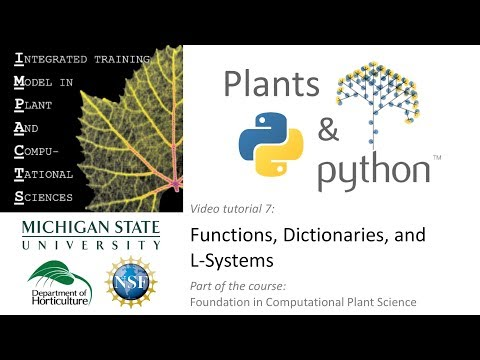

In [5]:
# Imports the functionality that we need to display YouTube videos in a Jupyter notebook.  
# You need to run this cell before you run ANY of the YouTube videos.
from IPython.display import YouTubeVideo

# Watch this video to learn about functions, dictionaries, and L-systems
YouTubeVideo("HIxmLFrVBYQ",width=640,height=360)


___
## [Fractal Generation with L-Systems](https://nb.paulbutler.org/l-systems/)

[Paul Butler](https://paulbutler.org/) put together an elegant tutorial implementing L-systems using Python. We will be using his code in this notebook to render the fractal and plant examples from *The Algorithmic Beauty of Plants*.

Before we go over Paul's functions, read over his tutorial yourself: [Fractal Generation with L-Systems](https://nb.paulbutler.org/l-systems/). You can also download Paul's tutorial as a [Jupyter notebook](https://nb.paulbutler.org/l-systems/Fractal%20Generation%20with%20L-Systems.ipynb) or run it on [Binder](https://gke.mybinder.org/v2/gh/paulgb/notebooks/master?filepath=source/l-systems/Fractal%20Generation%20with%20L-Systems.ipynb).

Be sure to understand how each of the functions works in his [tutorial](https://nb.paulbutler.org/l-systems/) before using them. A summary of the functions is provided below:

* `plot_coords()`
  * Takes a list of coordinates, converts them into separate lists of `x` and `y` values, and plots them
* `turtle_to_coords()`
  * Takes a turtle program as a string and interprets each character
  * Calculates and yields coordinates as the turtle moves
* `print_coords()`
  * Prints, instead of plots, a set of coordinates
* `transform_sequence()`
  * Takes an axiom sequence and with a dictionary of rules, returns a transformed sequence using the rules
* `transform_multiple()`
  * The same as `transform_sequence()`, except multiple transformations can be specified
* `branching_turtle_to_coords()`
  * Similar to the `turtle_to_coords()` function, but can interpret brackets to save states and render branching patterns
* `l_plot()`
  * Puts all the functions together! Given an axiom and transformations, uses `transform_multiple()` to create a turtle program, that is then passed to `branching_turtle_to_coords()` to create the resulting coordinates that are then plotted using `plot_coords()`

___
## Functions for fractals

With very slight modifications, the functions from Paul Butler's [Fractal Generation with L-Systems](https://nb.paulbutler.org/l-systems/) are reproduced below. Again, understand how these functions work and be ready to implement fractals and models of plant development afterwards!

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
nan = float('nan')

def plot_coords(coords, lw=0.5, bare_plot=True):
    if bare_plot:
        # Turns off the axis markers.
        plt.axis('off')
    # Ensures equal aspect ratio.
    plt.axes().set_aspect('equal', 'datalim')
    # Converts a list of coordinates into 
    # lists of X and Y values, respectively.
    X, Y = zip(*coords)
    # Draws the plot.
    plt.plot(X, Y, lw=lw, c='k')

In [7]:
from math import pi, sin, cos
DEGREES_TO_RADIANS = pi / 180

def turtle_to_coords(turtle_program, turn_amount=45):
    # The state variable tracks the current location and angle of the turtle.
    # The turtle starts at (0, 0) facing up (90 degrees).
    state = (0.0, 0.0, 90.0)
    
    # Throughout the turtle's journey, we "yield" its location. These coordinate
    # pairs become the path that plot_coords draws.
    yield (0.0, 0.0)
    
    # Loop over the program, one character at a time.
    for command in turtle_program:
        x, y, angle = state
        
        # Move turtle forward
        if command in 'Ff':      
            state = (x - cos(angle * DEGREES_TO_RADIANS),
                     y + sin(angle * DEGREES_TO_RADIANS),
                     angle)
            
            if command == 'f':
                # Insert a break in the path so that
                # this line segment isn't drawn.
                yield (float('nan'), float('nan'))
                
            yield (state[0], state[1])
                 
        # Turn turtle clockwise without moving
        elif command == '+':     
            state = (x, y, angle + turn_amount)
            
        # Turn turtle counter-clockwise without moving
        elif command == '-':     
            state = (x, y, angle - turn_amount)
            
        # Note: We silently ignore unknown commands

In [8]:
from math import isnan
def print_coords(coords):
    for (x, y) in coords:
        if isnan(x):
            print('<gap>')
        else:
            print('({:.2f}, {:.2f})'.format(x, y))

In [9]:
def transform_sequence(sequence, transformations):
    return ''.join(transformations.get(c, c) for c in sequence)

In [10]:
def transform_multiple(sequence, transformations, iterations):
    for _ in range(iterations):
        sequence = transform_sequence(sequence, transformations)
    return sequence

In [11]:
def branching_turtle_to_coords(turtle_program, turn_amount=45):
    saved_states = list()
    state = (0, 0, 90)
    yield (0, 0)

    for command in turtle_program:
        x, y, angle = state
        
        # Move forward (matches a-j and A-J)
        
        if command.lower() in 'abcdefghijklmnopqrstuvwxyz': 
            state = (x - cos(angle * DEGREES_TO_RADIANS),
                     y + sin(angle * DEGREES_TO_RADIANS),
                     angle)
            
            # Add a break in the line if command matches a-j  
            if command.islower():                  
                yield (float('nan'), float('nan'))

            yield (state[0], state[1])

        # Turn clockwise
        elif command == '+':                       
            state = (x, y, angle + turn_amount)

        # Turn counterclockwise
        elif command == '-':                       
            state = (x, y, angle - turn_amount)

        # Remember current state
        elif command == '[':                      
            saved_states.append(state)

        # Return to previous state
        elif command == ']':                       
            state = saved_states.pop()
            yield (float('nan'), float('nan'))
            x, y, _ = state
            yield (x, y)

        # Note: We silently ignore unknown commands

In [12]:
def l_plot(axiom, transformations, iterations=0, angle=45, lw=0.5):
    turtle_program = transform_multiple(axiom, transformations, iterations)
    coords = branching_turtle_to_coords(turtle_program, angle)
    plot_coords(coords, lw=lw, bare_plot=True)

___
## String rewriting

Now that we have a series of functions to implement L-systems, let's make some fractals!

The reading assignment for today's notebook is [Chapter 1](http://algorithmicbotany.org/papers/abop/abop-ch1.pdf) from *The Algorithmic Beauty of Plants*.

L-systems are intimately tied to fractals. The [Koch curve](https://en.wikipedia.org/wiki/Koch_snowflake) was one of the earliest fractals described. A Koch construction consists of an ***initiator*** and a ***generator***. The *initiator* is transformed using a set of *rewriting rules* or *productions*, where initiator segments are replaced by the *generator*. The following is quoted from Mandelbrot (of the [Mandelbrot set](https://en.wikipedia.org/wiki/Mandelbrot_set)) about the Koch construction in *The Algorithmic Beauty of Plants*:

> One begins with two shapes, an *initiator* and a *generator*.
The latter is an oriented broken line made up of N equal
sides of length r. Thus each stage of the construction begins
with a broken line and consists in replacing each straight
interval with a copy of the generator, reduced and displaced
so as to have the same end points as those of the interval
being replaced.

As we will see, L-systems work similarly, beginning with a string of characters known as an ***axiom*** in which each character is replaced as dictated by a set of ***production rules***. If a string is visually interpretted, L-systems can render fractals and models of plant morphology. A ***turtle graphics*** program is used to visually render L-systems strings. A cursor (the "turtle") will draw a line of unit length when it encounters a captial letter ("F" is commonly used, but other letters work too) in the program string and then stop. If the next character is a `+` or a `-` the turtle will change its angle clockwise or counter clockwise, respectively, such that when it moves again, the next line it draws will be at the new angle. If the turtle encounters a lowercase letter ("f" is commonly used, but other letters work too), it will move the unit distance at the specified angle, but it will not draw, leaving a space. Letters, characters, and other symbols can take on specific meanings given the production rules.

Review your functions to understand what the production rules are.

Coming back to Koch curves, an L-systems framework implemented using turtle graphics can reproduce these beautiful fractals.

Below, axioms and production rules for fractals in *The Algorithmic Beauty of Plants* are provided. Using your functions, visualize these fractals as you read through the chapter.

Be sure to:
* Try different numbers of iterations
* Play with the axiom
* Play with the production rules
* Try to understand how changes in the axiom or production rules propogate throughout the system with increasing iterations

In [14]:
axiom = 'F-F-F-F'
production_rules = {'F':'F+FF-FF-F-F+F+FF-F-F+F+FF+FF-F'}
iterations = 2
angle = 90

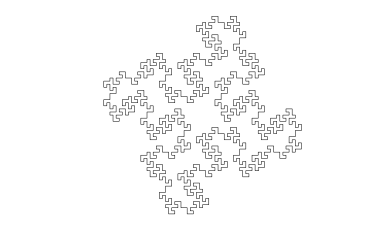

In [9]:
### ANSWER ###

l_plot('F-F-F-F', {'F':'F+FF-FF-F-F+F+FF-F-F+F+FF+FF-F'}, 2, 90)

In [16]:
axiom = '-F'
production_rules = {'F':'F+F-F-F+F'}
iterations = 4
angle = 90

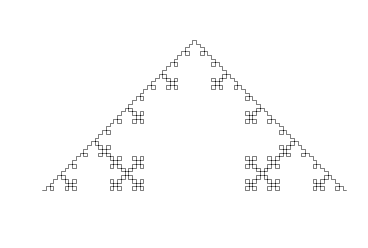

In [11]:
### ANSWER ###

l_plot('-F', {'F':'F+F-F-F+F'}, 4, 90)

In [18]:
axiom = 'F+F+F+F'
production_rules = {'F':'F+f-FF+F+FF+Ff+FF-f+FF-F-FF-Ff-FFF', 'f':'ffffff'}
iterations = 2
angle = 90

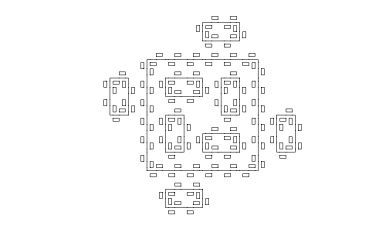

In [13]:
### ANSWER ###

l_plot('F+F+F+F', {'F':'F+f-FF+F+FF+Ff+FF-f+FF-F-FF-Ff-FFF', 'f':'ffffff'}, 
       2, 90)

In [20]:
axiom = 'F-F-F-F'
production_rules = {'F':'FF-F-F-F-F-F+F'}
iterations = 4
angle = 90

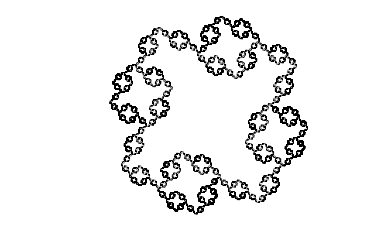

In [15]:
### ANSWER ###

l_plot('F-F-F-F', {'F':'FF-F-F-F-F-F+F'}, 
       4, 90)

In [22]:
axiom = 'F-F-F-F'
production_rules = {'F':'FF-F-F-F-FF'}
iterations = 4
angle = 90

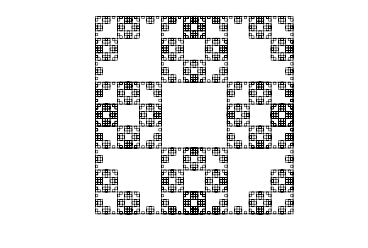

In [17]:
### ANSWER ###

l_plot('F-F-F-F', {'F':'FF-F-F-F-FF'}, 
       4, 90)

In [27]:
axiom = 'F-F-F-F'
production_rules = {'F':'FF-F+F-F-FF'}
iterations = 3
angle = 90

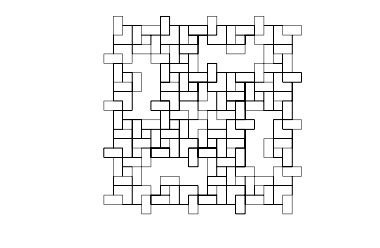

In [19]:
### ANSWER ###

l_plot('F-F-F-F', {'F':'FF-F+F-F-FF'}, 
       3, 90)

In [29]:
axiom = 'F-F-F-F'
production_rules = {'F':'FF-F--F-F'}
iterations = 4
angle = 90

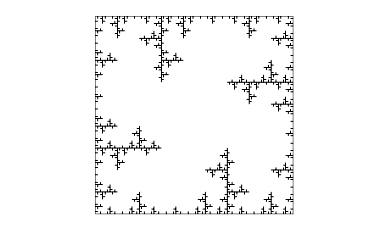

In [21]:
### ANSWER ###

l_plot('F-F-F-F', {'F':'FF-F--F-F'}, 
       4, 90)

In [31]:
axiom = 'F-F-F-F'
production_rules = {'F':'F-FF--F-F'}
iterations = 5
angle = 90

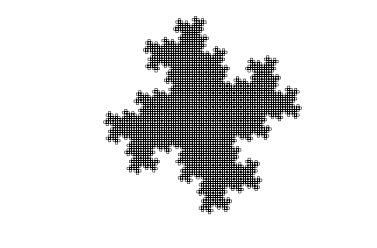

In [23]:
### ANSWER ###

l_plot('F-F-F-F', {'F':'F-FF--F-F'}, 
       5, 90)

In [33]:
axiom = 'F-F-F-F'
production_rules = {'F':'F-F+F-F-F'}
iterations = 4
angle = 90

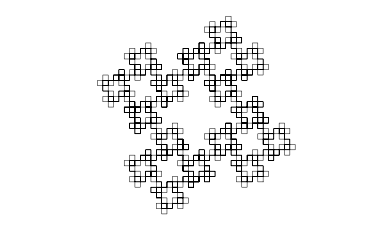

In [25]:
### ANSWER ###

l_plot('F-F-F-F', {'F':'F-F+F-F-F'}, 
       4, 90)

**Edge rewriting**

Edge rewriting is similar to Koch constructions. Assuming two types of edges, *left* and *right*, re-writing  can produce a multitude of interesting curves. Some of these curves are of the *FASS* class (space-Filling, self-Avoiding, Simple, and self-Similar).

Try out the following edge rewriting constructions from *The Algorithmic Beauty of Plants*.

In [35]:
axiom = 'L'
production_rules = {'L':'L+R+', 'R':'-L-R'}
iterations = 10
angle = 90

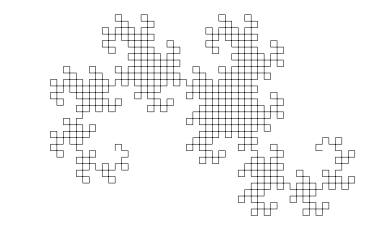

In [27]:
### ANSWER ###

l_plot('L', {'L':'L+R+', 'R':'-L-R'}, 
       10, 90)

In [37]:
axiom = 'R'
production_rules = {'L':'R+L+R', 'R':'L-R-L'}
iterations = 6
angle = 60

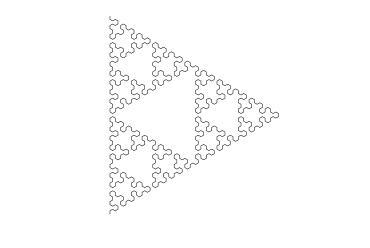

In [29]:
### ANSWER ###

l_plot('R', {'L':'R+L+R', 'R':'L-R-L'}, 
       6, 60)

In [39]:
axiom = 'L'
production_rules = {'L':'L+R++R-L--LL-R+', 'R':'-L+RR++R+L--L-R'}
iterations = 4
angle = 60

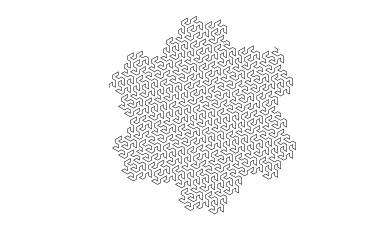

In [31]:
### ANSWER ###

l_plot('L', {'L':'L+R++R-L--LL-R+', 'R':'-L+RR++R+L--L-R'}, 4, 60)

In [41]:
axiom = '-R'
production_rules = {'L':'LL-R-R+L+L-R-RL+R+LLR-L+R+LL+R-LR-R-L+L+RR-', 
              'R':'+LL-R-R+L+LR+L-RR-L-R+LRR-L-RL+L+R-R-L+L+RR'}
iterations = 2
angle = 90

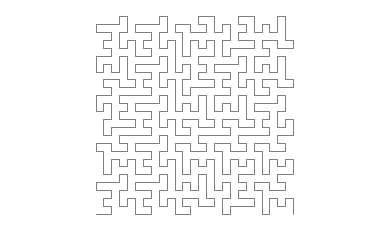

In [33]:
### ANSWER ###

l_plot('-R', {'L':'LL-R-R+L+L-R-RL+R+LLR-L+R+LL+R-LR-R-L+L+RR-', 
              'R':'+LL-R-R+L+LR+L-RR-L-R+LRR-L-RL+L+R-R-L+L+RR'}, 2, 90)


___
## Branching L-systems

The branching patterns of plants should immediately strike you as fractal-like: that is, they are ***self-similar***. This is especially apparent if you compare two different species with very different branching patterns. There is something in the angle, the spacing of the branches, and their ramification that is repetitive, unique to different species. Like L-systems, these patterns arise through production rules. Except unlike L-systems, these rules are not humanmade and manifest as a result of sophisticated genetic machinery and its responses to the environment. L-systems are the model, trees are the reality.

However, the L-systems we have produced thus far are not very plant-like. They don't ***branch***. The self-similarity of trees is closely tied to branching. As mentioned before, all the aerial portions of a plant (the ***shoot***) are derived from a single shoot apical meristem. This meristem iteratively produces ***phytomers***. Phytomers consist of:

1. Internode
2. Node
  * Leaf
  * Axillary meristem

The axillary meristems are meristems just like the shoot apical meristem from which they are derived, and they can produce branching shoots, with more internodes, leaves, and axillary meristems, just like the main branch on which they were patterned. The activation of the axillary meritems is what underlies branching patterns. If the axillary meristems remain dormant, there are no branches: the main branch just continues to make leaves and flowers in a straight line. If all axillary meristems create branches, and the axillary meristems they create create branches too, then plant architecture becomes a mess, a bush. There are intermediates of course: maybe only axillary meristems at the top or bottom of a shoot make branches, maybe they make branches only in certain contexts (like the shoot apical meristem being destroyed), maybe branching follows a temporal pattern from the bottom-up (basipetal) or top-down (acropetal), maybe only a finite number of nodes are produced for each branching event. Branching is the generator of diverse plant forms, modified by numerous variables.

However, at the moment, our L-systems models don't branch.

To accomodate branching, there are two new characters that are added to the L-system production rules: `[` and `]`.

When a `[` square bracket is encountered, the current 1) position and 2) angle are saved. The turtle's state is preserved such that it can be returned to the exact state at a later time. With a position and angle in memory, the turtle then begins to execute the program within the brackets. When the turtle encounters the next `]` bracket, wherever it is or whatever angle it is oriented, it *reverts* back to the stored position and angle as a saved state in its memory when it encountred the first `[` bracket. Then, the turtle resumes drawing the program outside the brackets.

Brackets are a lot like axillary meristems. They are similar to a meristem that will undergo its own branching program, independent of the main branch from which it is derived. With each iteration, the characters within the brackets are rewritten, just like a meristem would grow and produce a branch, the branch itself iterating.

Review the `branching_turtle_to_coords()` function, and how when a `[` bracket is encountered the state is saved by appending to a list, and when a `]` bracket is encountered, how the saved state is retrieved, using the `.pop()` function.

Below, axioms and production rules for branching architectures in *The Algorithmic Beauty of Plants* are provided. Using your functions, visualize these fractals as you read through the chapter.

Be sure to:
* Try different numbers of iterations, how well does the number of iterations correspond to plant growth?
* Add production rules
* Can you add rules to model a growing stem?
* What happens if you add or remove branches?
* What happens if branches behave just like the main branch? What happens if the branch has a different program within the brackets?

In [43]:
axiom = 'F'
production_rules = {'F':'F[+F]F[-F]F'}
iterations = 5
angle = 25.7

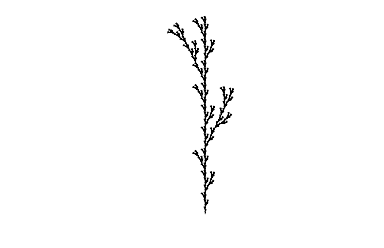

In [35]:
### ANSWER ###

l_plot('F', {'F':'F[+F]F[-F]F'}, 5, 25.7)

In [45]:
axiom = 'F'
production_rules = {'F':'F[+F]F[-F][F]'}
iterations = 5
angle = 20

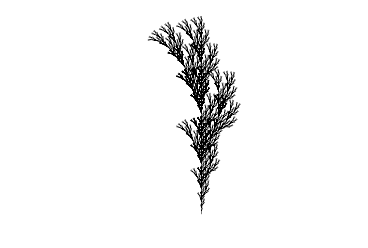

In [37]:
### ANSWER ###

l_plot('F', {'F':'F[+F]F[-F][F]'}, 5, 20)

In [47]:
axiom = 'F'
production_rules = {'F':'FF-[-F+F+F]+[+F-F-F]'}
iterations = 4
angle = 22.5

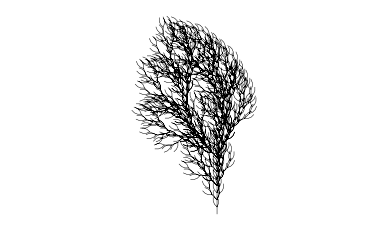

In [39]:
### ANSWER ###

l_plot('F', {'F':'FF-[-F+F+F]+[+F-F-F]'}, 4, 22.5)


In [49]:
axiom = 'X'
production_rules = {'X':'F[+X]F[-X]+X', 'F':'FF'}
iterations = 7
angle = 20

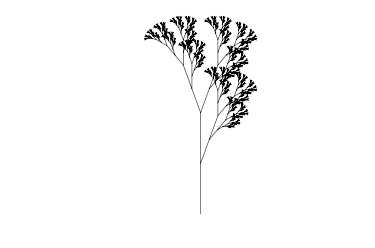

In [41]:
### ANSWER ###

l_plot('X', {'X':'F[+X]F[-X]+X', 'F':'FF'}, 7, 20)


In [51]:
axiom = 'X'
production_rules = {'X':'F[+X][-X]FX', 'F':'FF'}
iterations = 7
angle = 25.7

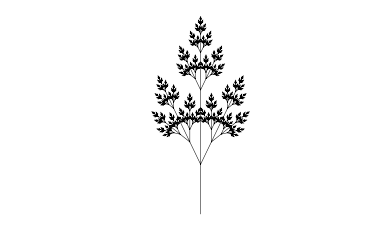

In [43]:
### ANSWER ###

l_plot('X', {'X':'F[+X][-X]FX', 'F':'FF'}, 7, 25.7)

In [53]:
axiom = 'X'
production_rules = {'X':'F-[[X]+X]+F[+FX]-X', 'F':'FF'}
iterations = 5
angle = 22.5

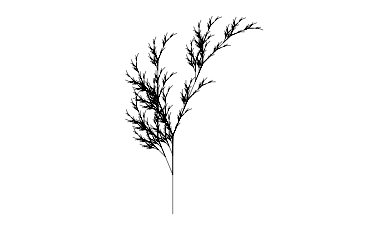

In [45]:
### ANSWER ###

l_plot('X', {'X':'F-[[X]+X]+F[+FX]-X', 'F':'FF'}, 5, 22.5)

____
## 3D L-systems

Our L-systems renderings have been in 2D until now. But of course, trees exist in 3D! If we move to 3D, there are many more orientations that our turtle must consider. The principles are the same, but they are more complex, requiring more characters and production rules.

[Chapter 1](http://algorithmicbotany.org/papers/abop/abop-ch1.pdf), Section 1.5 of *The Algorithmic Beauty of Plants* gives the additional production rules a turtle program requires in 3D. These include `+` and `-` to turn left and right, `&` and `^` for pitch down and up, `\` and `/` for roll left and roll right, and `|` to turn around. Implementing these additional production rules is difficult and beyond the scope of this notebook. But luckily somebody else has already done the coding for us!

[Andy He](https://twitter.com/andonutts) has implemented a [browser-based 3D L-systems interface](https://andonutts.github.io/donatello/). Check out the examples from *The Algorithmic Beauty of Plants*, including the 3D Hilbert curve and the plant with flowers!

Just like with your own code, play around with the axioms and the production rules. For the plants that Andy has included, especially pay attention to how leaves and flowers are encoded in the production rules. Have fun!

____
That's all for this lesson! If you are not in the course and are using these materials remotely and would like the answers, feel free to email Dr. Dan Chitwood (Michigan State University, Depts. Horticulture and Computational Mathematics, Science, & Engineering) at dhchitwood [ at ] gmail [ dot ] com